## Metadata analyses by clusters - water

Comments: There were many great suggestions on what to look at in the 3 clusters; for example: 
<li>A. molecular properties such as diversity indices, classes (i.e. lignin, aliphatic compounds), NOSC, H/C and O/C ratios, DBE, AI_Mod….. 
<li>B. a focus on environmental processes: NPOC/Fe representing more "terrestrial" inputs VS 18O/2H that might represent more groundwater inputs
<br>We should also try and create a plot for ’NPOC vs Fe’ and ‘18O vs 2H’. 
<br>The more molecular stuff maybe as well in a similar way ? ‘H/C vs O/C’  ? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set_theme()

In [2]:
# Metadata
metadata = pd.read_csv('../Dataset/FTICR_meta_all_2021-09-29.csv').set_index('ID')
print('Metadata: ' + str(metadata.shape))
label1 = pd.read_csv('water_cluster_label.csv')
print('Water: ' + str(label1.shape))
label2 = pd.read_csv('sediment_cluster_label.csv')
print('Sediment: ' + str(label2.shape))
label = pd.concat([label1,label2], axis=0)

label = label.set_index('sample_id')

df = metadata.join(label,how='left')

df.head()

Metadata: (504, 69)
Water: (265, 2)
Sediment: (239, 2)


,river.id,sample.type,location.id,sampling.type,replicate.id,original.id,Date,Start_Time,Time_zone,Stream_Name,Stream_Order,City,State_or_Province,Country,General_Vegetation,Weather,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,Sediment,Distance_DS.and.MS_meters,Distance_MS.and.US_meters,Primary.Sources.Flow.Variation,pH,Temp_degC,DO_perc.sat,DO_mg.per.L,Algal.Mat.Coverage,Depositional.Type,Latitude_dec.deg,Longitude_dec.deg,Macrophyte.Coverage,Sunlight.Access_Perc.Canopy.Cover,Water.Column.Height_cm,Sampler_Organization,Associated_Site,Sampler_Name,Approx.Distance.From.Gauge_meters,Discharge_Link,US.or.DS.of.Gauge,Gauge_Latitude_dec.deg,Gauge_Longitude_dec.deg,Met.Station.Nearby,Met.Station,Precipitation.Within.Week,Number.Days.Since.Precip,Dam.Upstream.Site,Dam,Contamination.Source.Upstream,Contamination.Source,Water.Quality.Data.Available,Water.Quality.Data,Known.Data,Published.Work.On.Site,Published.Work,Notes,Study_Code,resprate_mg.L.h,resp.inc.time.min,resp.r2,resp.pval,NPOC_mg.L.asC,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,cluster
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SED_S19S.0001_D_Field,S19S.0001,SED,D,Field,NaN,S19S_0001_Sed_Field_ICR.D_p2,19-Sep-19,12:00,PST,Fraser,9.0,Hope,British Columbia,Canada,Grass,Partly cloudy,Single-channel meandering,Relatively flat/gentle gradient (e.g. valleys),Perennial,Sand,15.0,15.0,Natural flow (seasonal). Glacial melt,NaN,NaN,NaN,NaN,No,Shallow waters near the shore,49.38609,-121.45047,No,Full sunlight (0-20% canopy cover),17,Thompson Rivers University,NaN,Eric Bottos,100,https://wateroffice.ec.gc.ca/report/real_time_...,Downstream,49.38583,-121.45416,Yes,Hope A: https://climate.weather.gc.ca/climate_...,Yes,1,No,NaN,Yes,Town of Hope. population of ~6100. 0m from sam...,Yes,Turbidity. Specific Conductivity. Temperature....,Specific Conductivity: 116.58 uS/cm http://aqu...,NaN,https://www.jstor.org/stable/4251587?seq=1#met...,NaN,WHONDRS_S19S,NaN,NaN,NaN,NaN,2.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sed_2
SED_S19S.0001_M_Field,S19S.0001,SED,M,Field,NaN,S19S_0001_Sed_Field_ICR.M_p2,19-Sep-19,12:00,PST,Fraser,9.0,Hope,British Columbia,Canada,Grass,Partly cloudy,Single-channel meandering,Relatively flat/gentle gradient (e.g. valleys),Perennial,Sand,15.0,15.0,Natural flow (seasonal). Glacial melt,NaN,NaN,NaN,NaN,No,Shallow waters near the shore,49.38626,-121.45055,No,Full sunlight (0-20% canopy cover),16,Thompson Rivers University,NaN,Eric Bottos,100,https://wateroffice.ec.gc.ca/report/real_time_...,Downstream,49.38583,-121.45416,Yes,Hope A: https://climate.weather.gc.ca/climate_...,Yes,1,No,NaN,Yes,Town of Hope. population of ~6100. 0m from sam...,Yes,Turbidity. Specific Conductivity. Temperature....,Specific Conductivity: 116.58 uS/cm http://aqu...,NaN,https://www.jstor.org/stable/4251587?seq=1#met...,NaN,WHONDRS_S19S,NaN,NaN,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sed_2
SED_S19S.0001_U_Field,S19S.0001,SED,U,Field,NaN,S19S_0001_Sed_Field_ICR.U_p2,19-Sep-19,12:00,PST,Fraser,9.0,Hope,British Columbia,Canada,Grass,Partly cloudy,Single-channel meandering,Relatively flat/gentle gradient (e.g. valleys),Perennial,Sand,15.0,15.0,Natural flow (seasonal). Glacial melt,NaN,NaN,NaN,NaN,No,Shallow waters near the shore,49.38639,-121.45063,Low,Full sunlight (0-20% canopy cover),19,Thompson Rivers University,NaN,Eric Bottos,100,https://wateroffice.ec.gc.ca/report/real_time_...,Downstream,49.38583,-121.45416,Yes,Hope A: https://climate.weather.gc.ca/climate_...,Yes,1,No,NaN,Yes,Town of Hope. population of ~6100. 0m from sam...,Yes,Turbidity. Specific Conductivity. Temperature....,Specific Conductivity: 116.58 uS/cm http://aqu...,NaN,https://www.jstor.org/stable/4251587?seq=1#met...,NaN,WHONDRS_S19S,NaN,NaN,NaN,NaN,3.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sed_2
SED_S19S.0003_D_Field,S19S.0003,SED,D,Field,NaN,S19S_0003_Sed_Field_ICR.D_p15,8-Sep-19,15:15,PST,Thompson,7.0,Kamloops,British Columbia,Canada,Not vegetated,Partly cloudy,Single-channel str

In [3]:
df['cluster'].value_counts()

sw_0     147
sed_2    146
sw_2      90
sed_0     76
sw_1      28
sed_1     17
Name: cluster, dtype: int64

In [4]:
# # Molecular parameters
# mparams1 = pd.read_csv('../Dataset/Water_Prevalence_10_crosstable_2021-09-29.csv')
# mparams2 = pd.read_csv('../Dataset/Sediment_Prevalence_10_crosstable_2021-09-29.csv')

## Water

In [5]:
dfw = df[df['sample.type']=='SW']

#### Check missing value per column

In [6]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", dfw.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 river.id                               0
sample.type                            0
location.id                            0
sampling.type                        265
replicate.id                           0
original.id                            0
Date                                   0
Start_Time                             0
Time_zone                              2
Stream_Name                            0
Stream_Order                          38
City                                   0
State_or_Province                     13
Country                                0
General_Vegetation                     0
Weather                                9
Hydrogeomorphology                     0
River_Gradient                         0
Intermittent_or_Perennial              7
Sediment                               0
Distance_DS.and.MS_meters              0
Distance_MS.and.US_meters              0
Primary.Sources.Flow.Variation        22
pH  

In [7]:
colmiss = ['Stream_Order', #cat
           'Number.Days.Since.Precip', #cat
           'del2H_permil', #num
           'del18O_permil'] #num

water =dfw.copy()

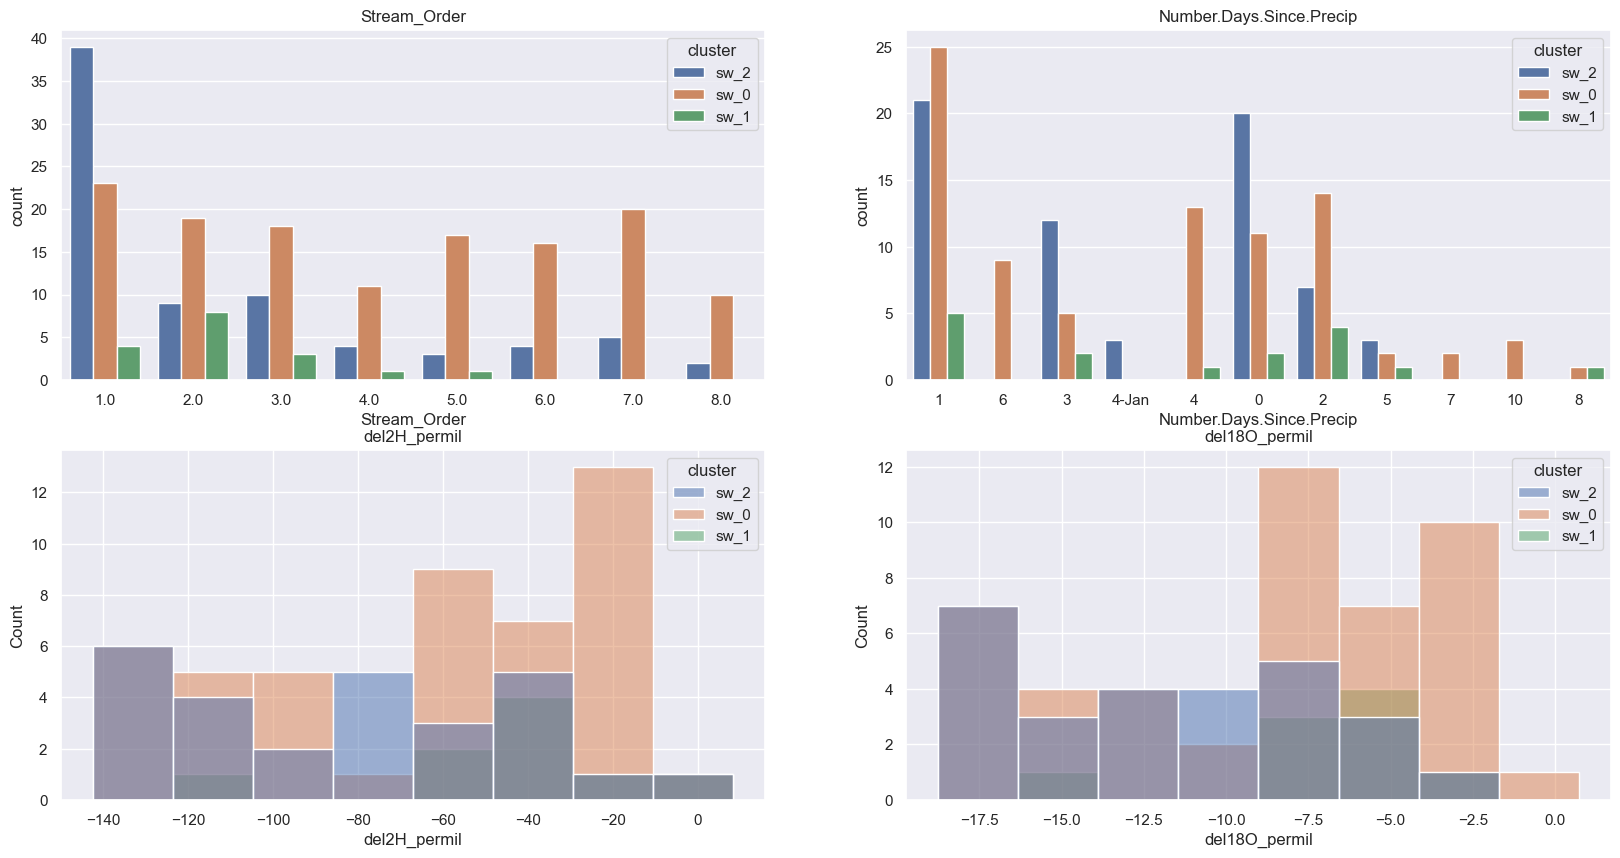

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
f,axs = plt.subplots(2,2)
axs = axs.ravel()

cnt = 0
for i in colmiss:
    if cnt < 2:
        sns.countplot(data=water, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    if cnt >= 2:
        sns.histplot(data=water, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

In [9]:
water.groupby('cluster')[colmiss[-2:]].describe()

del2H_permil                                                         \
               count       mean        std    min     25%   50%    75%  max   
cluster                                                                       
sw_0            47.0 -62.351064  41.634063 -131.3  -96.70 -49.8 -26.40  8.3   
sw_1             9.0 -46.244444  31.301602 -121.1  -49.20 -38.9 -34.10 -8.4   
sw_2            27.0 -82.648148  40.376701 -142.4 -121.45 -84.3 -47.85 -3.8   

        del18O_permil                                                         
                count       mean       std    min    25%    50%    75%   max  
cluster                                                                       
sw_0             47.0  -8.815957  5.100884 -17.32 -12.94  -7.98 -4.315  0.72  
sw_1              9.0  -7.172222  3.596595 -15.83  -7.68  -6.53 -6.010 -2.76  
sw_2             27.0 -11.683333  4.817000 -18.75 -16.37 -11.76 -7.295 -2.14

In [10]:
water.dtypes

river.id                              object
sample.type                           object
location.id                           object
sampling.type                         object
replicate.id                         float64
original.id                           object
Date                                  object
Start_Time                            object
Time_zone                             object
Stream_Name                           object
Stream_Order                         float64
City                                  object
State_or_Province                     object
Country                               object
General_Vegetation                    object
Weather                               object
Hydrogeomorphology                    object
River_Gradient                        object
Intermittent_or_Perennial             object
Sediment                              object
Distance_DS.and.MS_meters            float64
Distance_MS.and.US_meters            float64
Primary.So

In [11]:
target = ['cluster']

In [12]:
# 16
colnum = ['Distance_DS.and.MS_meters',
          'Distance_MS.and.US_meters',
          'pH',
          'Temp_degC',
          'Approx.Distance.From.Gauge_meters',
          'Number.Days.Since.Precip',
          'NPOC_mg.L.asC', 
          'del2H_permil',
          'del18O_permil',
          'Cl_mgL',
          'SO4_mgL',
          'NO3_mgL',
          'NO2_mgL',
          'F_mgL']
#          'Richness observed','Simpson\'s Diversity Index']

# Data cleaning
water.loc[(water['pH'] == '> 7.5'),'pH']= 8.0
water.loc[(water['pH'] == '7.7 (with WTW sensor). strip: 7.5'), 'pH']= 7.7
water.loc[(water['pH'] == '7.0 (6.74 with pH probe)'), 'pH']= 7.0
water.loc[(water['pH'] == '7.5-8'), 'pH']= 7.8

water.loc[(water['Temp_degC'] == '18-20'), 'Temp_degC']= 19.0

water.loc[(water['Approx.Distance.From.Gauge_meters'] == '<100'), 'Approx.Distance.From.Gauge_meters']= 99.0

water.loc[(water['Number.Days.Since.Precip'] == '4-Jan'), 'Number.Days.Since.Precip']= 4

water[colnum] = water[colnum].astype(float)

In [13]:
# 12
colcat = ['Country',
          'General_Vegetation',
          'Weather',
          'Hydrogeomorphology',
          'Intermittent_or_Perennial',
          'Sediment',
          'US.or.DS.of.Gauge',
          'Precipitation.Within.Week',
          'Dam.Upstream.Site',
          'Stream_Order',
          'River_Gradient',
          'Primary.Sources.Flow.Variation']

water[colcat] = water[colcat].astype(str)

#### Categorical column

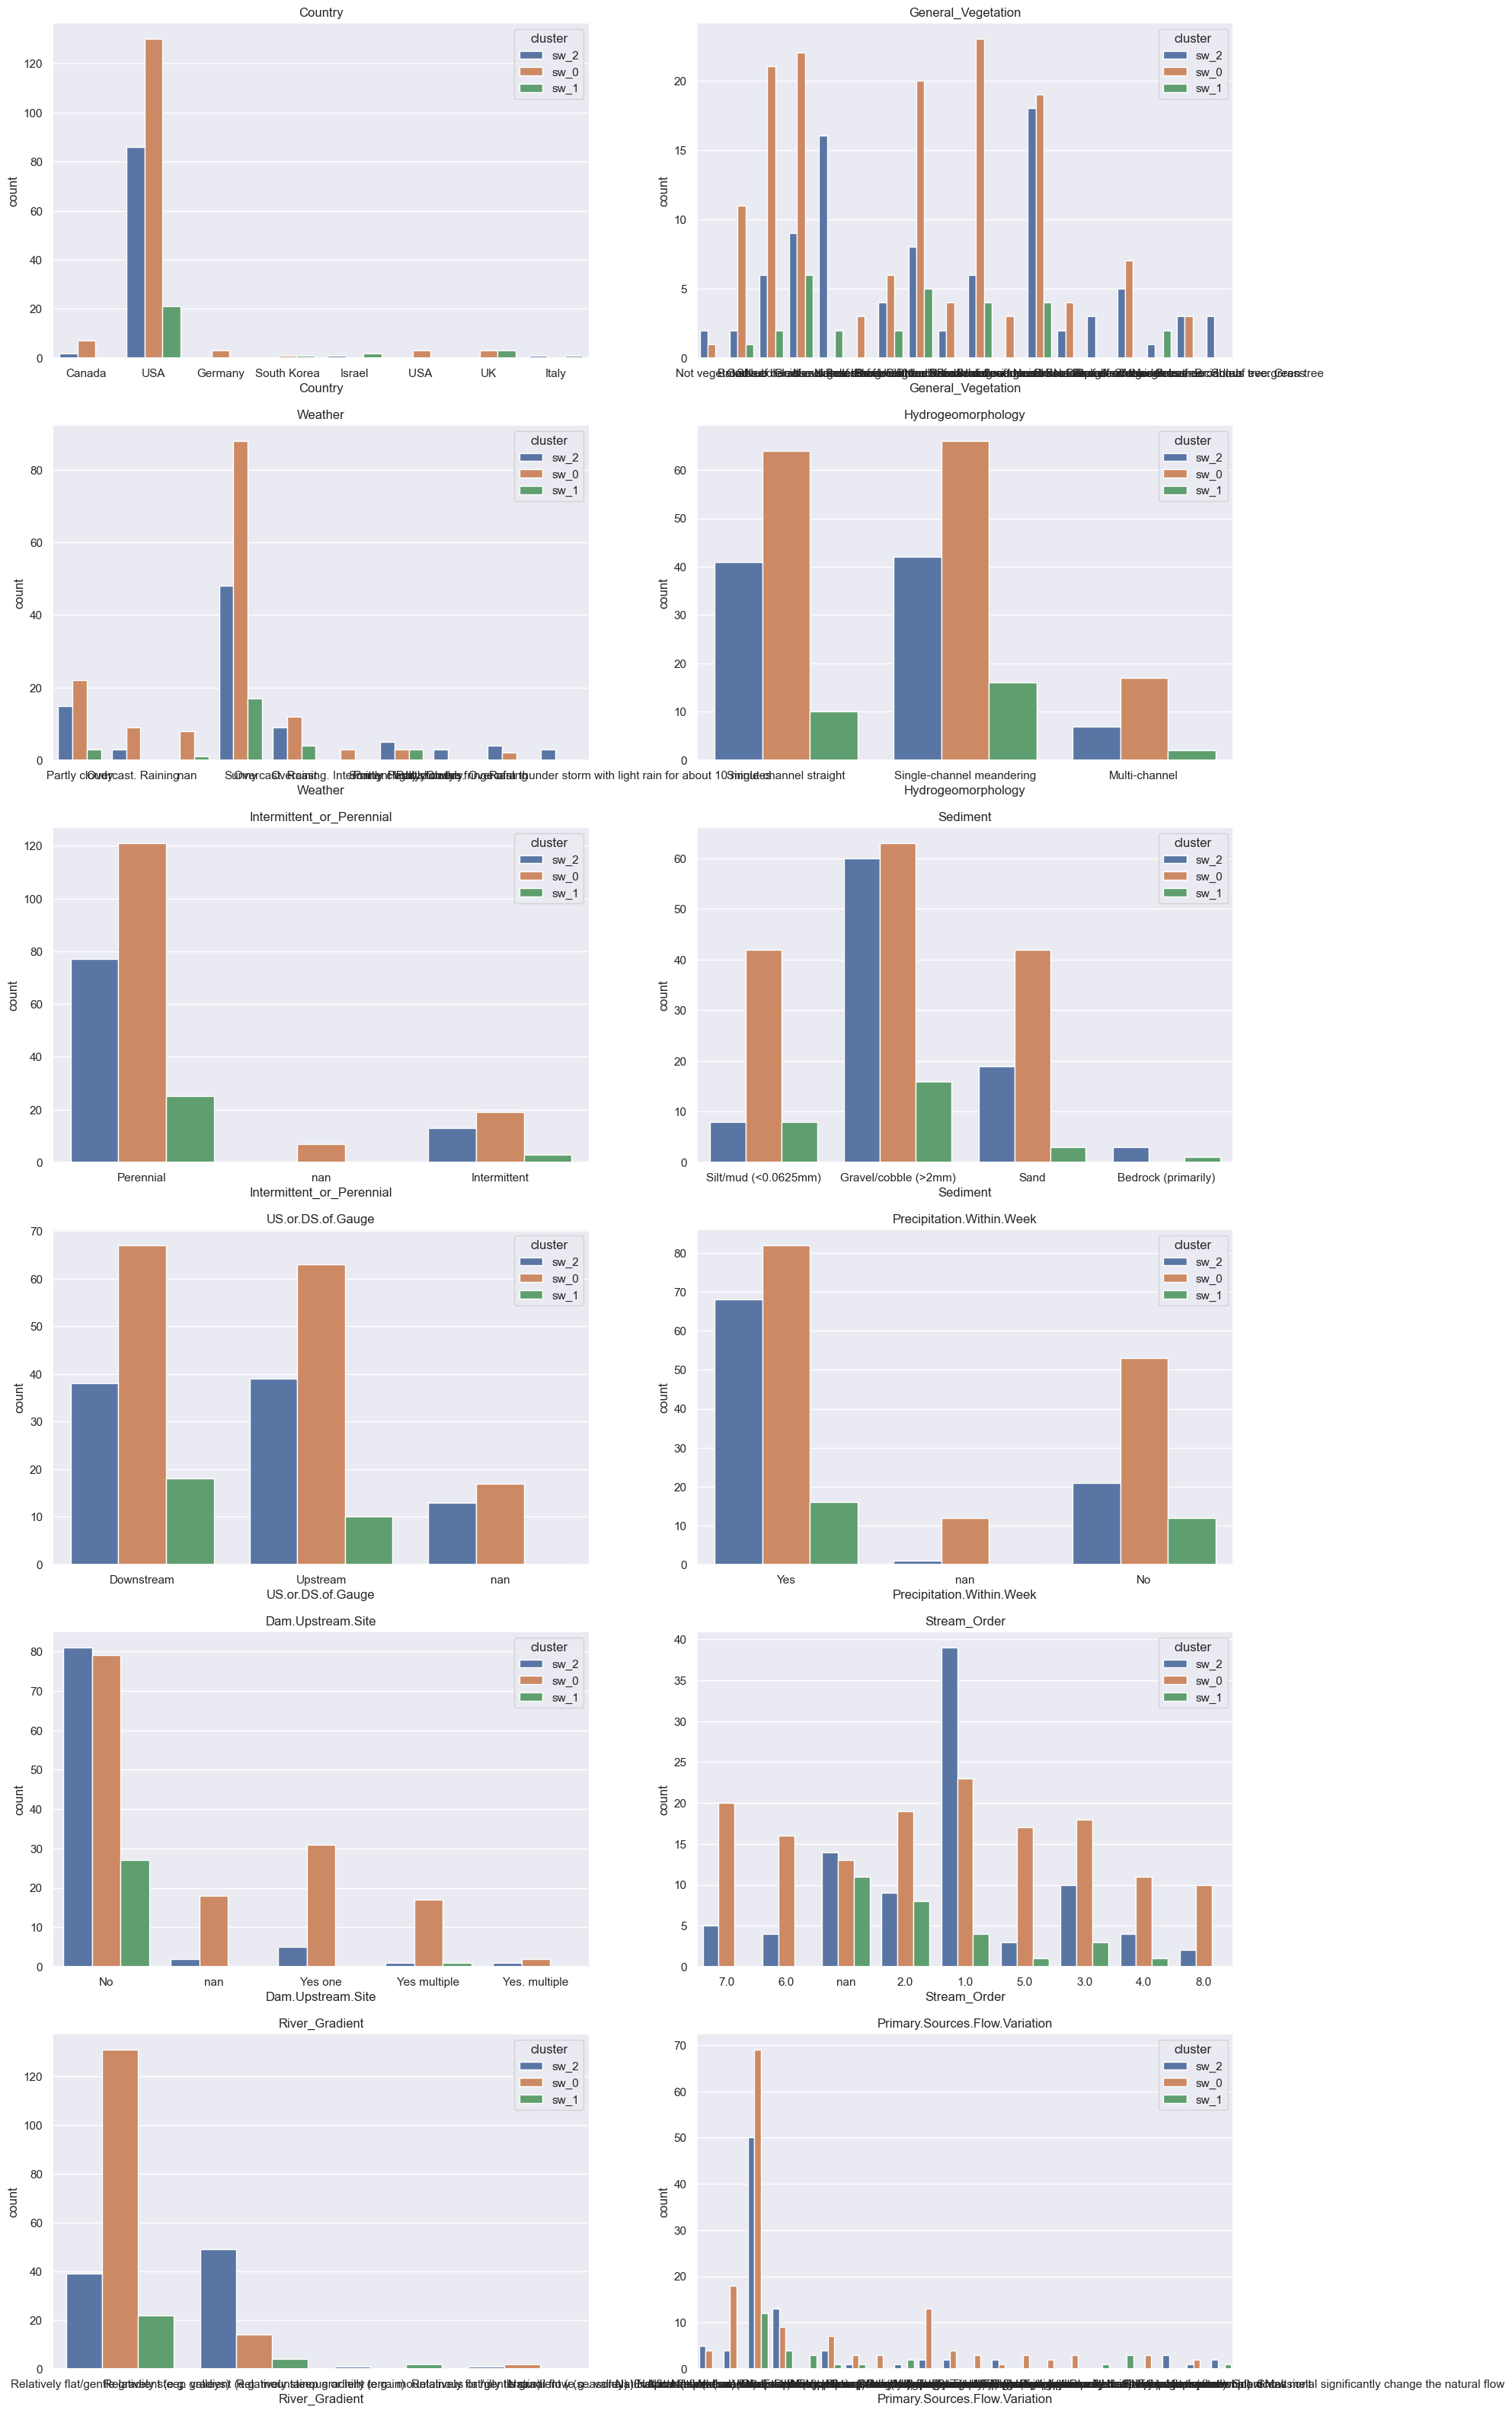

In [14]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(6,2)
axs = axs.ravel()

cnt = 0
for i in colcat:
    sns.countplot(data=water, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

#### Numerical column

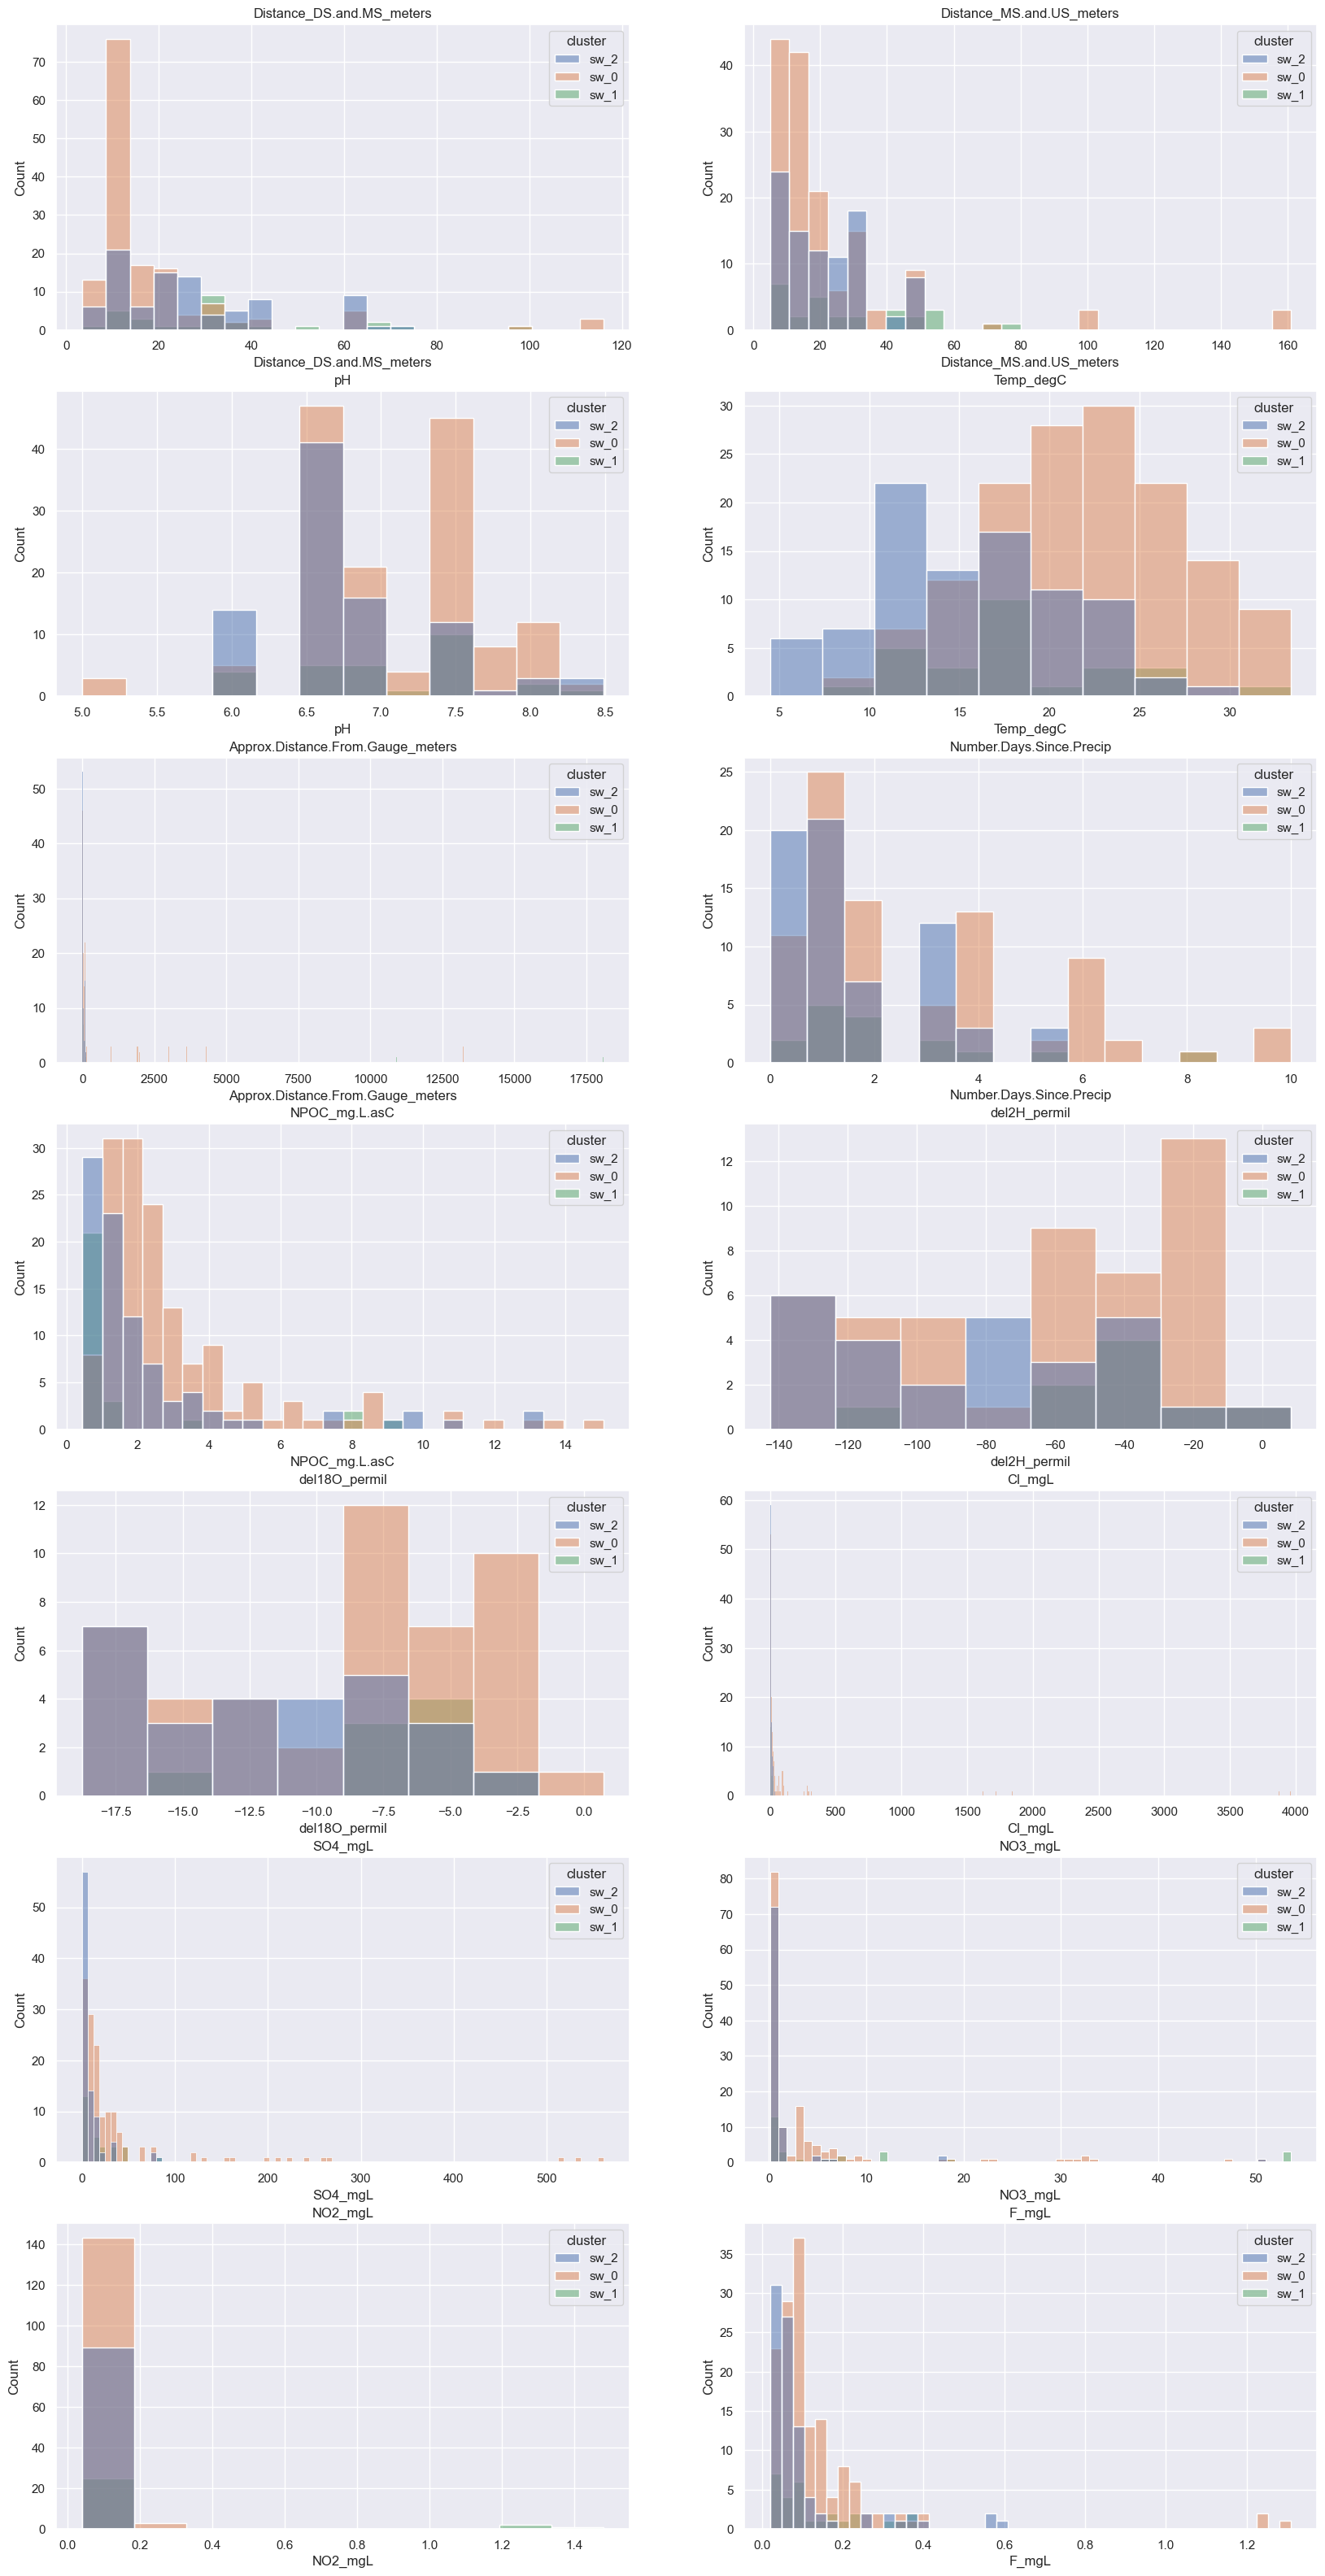

In [15]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(7,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.histplot(data=water, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

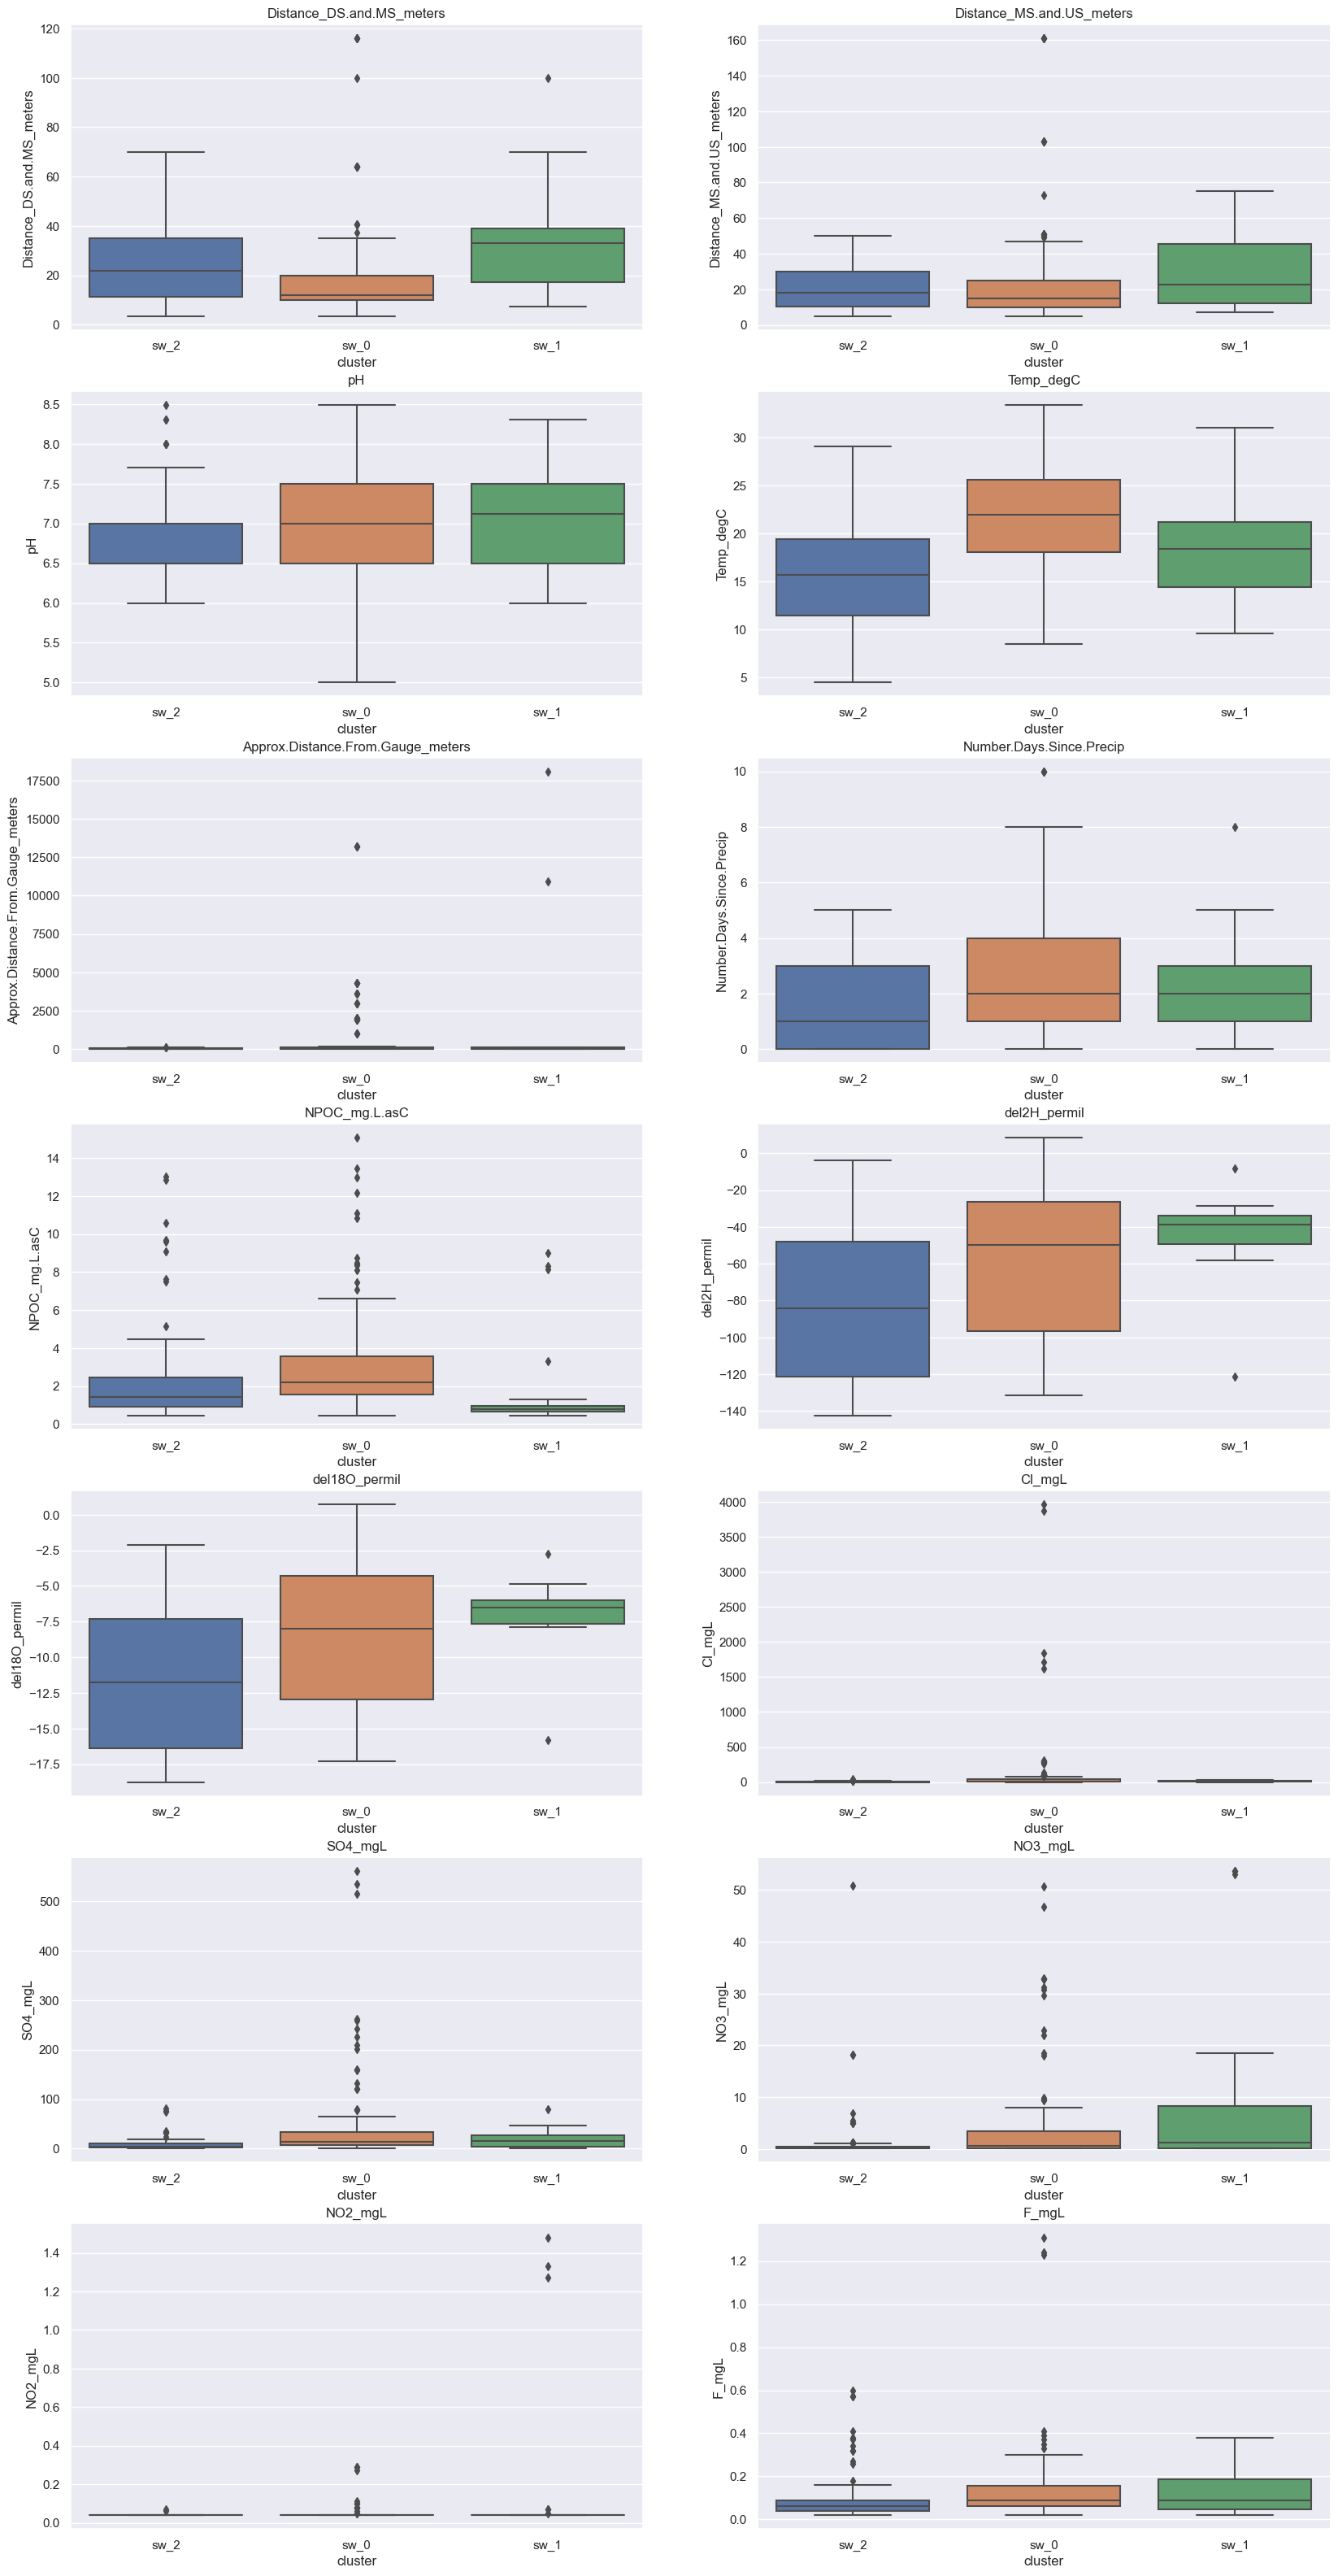

In [16]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(7,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.boxplot(x='cluster', y=i, data=water, orient='v', ax=axs[cnt]).set_title(i)
    cnt = cnt + 1

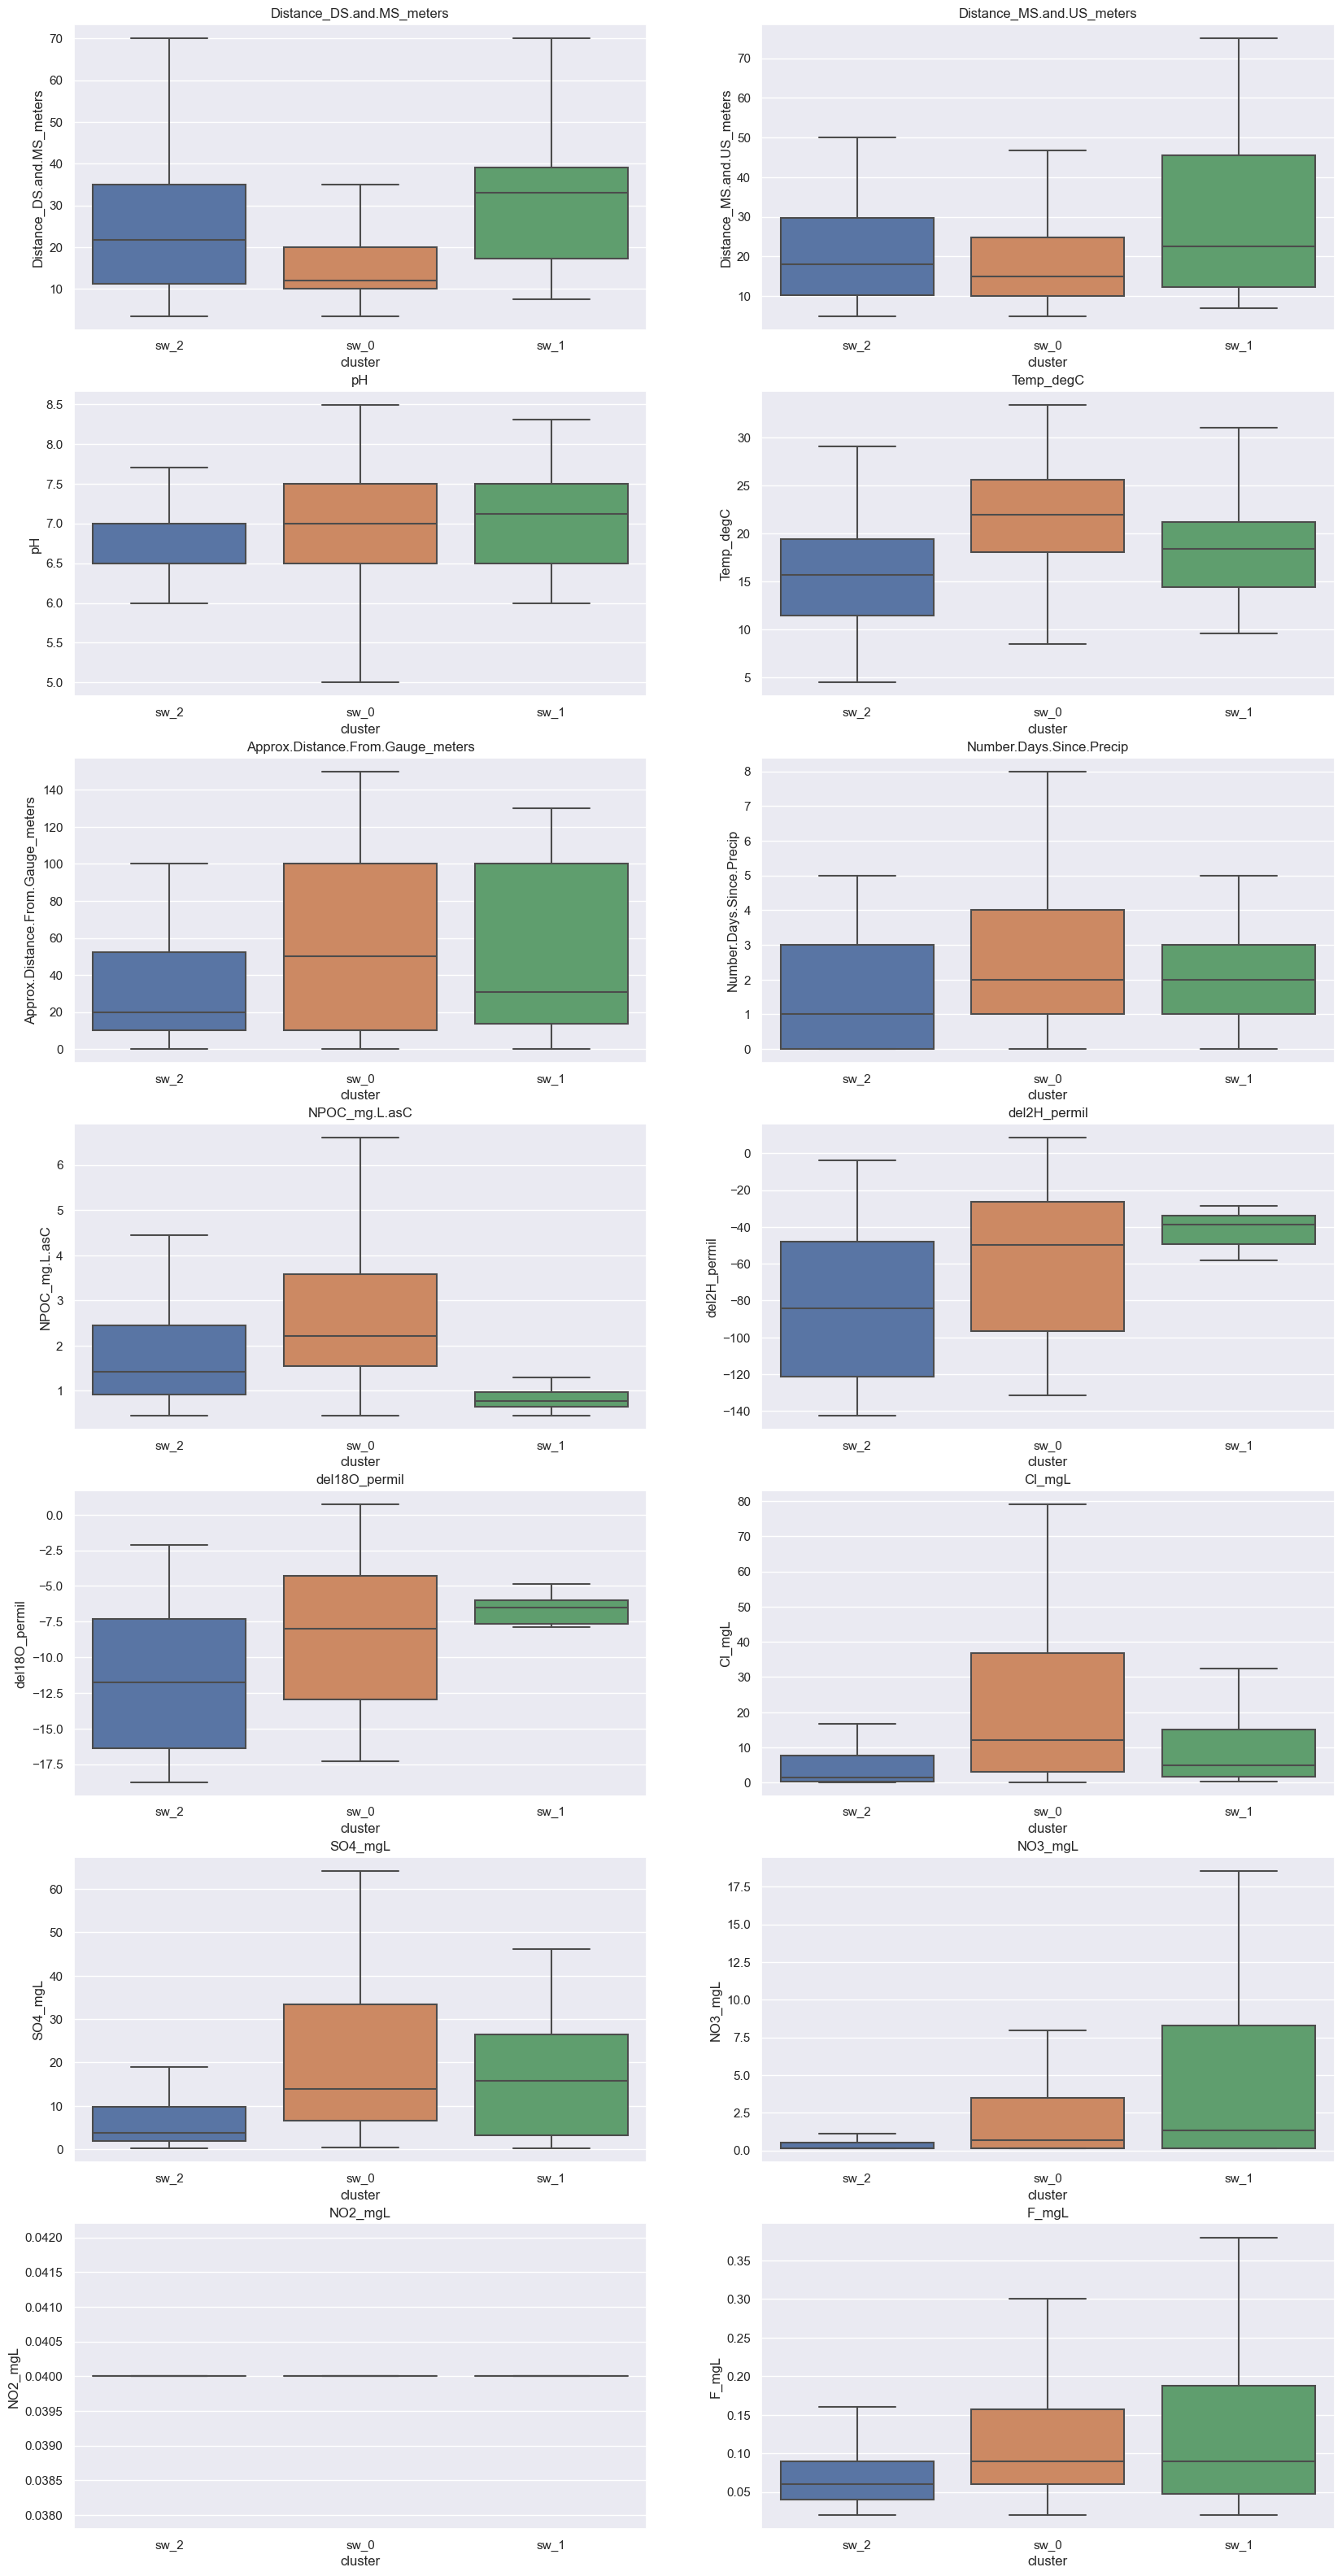

In [17]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(7,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.boxplot(x='cluster', y=i, data=water, orient='v', ax=axs[cnt], showfliers = False).set_title(i)
    cnt = cnt + 1

# Start: Update Jan 2024 - Statistical significance

In [18]:
#Reference: https://blog.4dcu.be/programming/2021/12/30/Posthoc-Statannotations.html
from scipy.stats import kruskal

# Extract the individual groups from the DataFrame
group0 = water[water['cluster'] == 'sw_0'][colnum]
group1 = water[water['cluster'] == 'sw_1'][colnum]
group2 = water[water['cluster'] == 'sw_2'][colnum]

print('cluster sw_0' + str(group0.shape))
print('cluster sw_1' + str(group1.shape))
print('cluster sw_2' + str(group2.shape))

cluster sw_0(147, 14)
cluster sw_1(28, 14)
cluster sw_2(90, 14)


In [19]:
# Perform the Kruskal-Wallis test after dropping nan values, 
# The function returns two values: the test statistic and the p-value. 
# p-value < 0.05 indicates significant difference in the medians among the three groups.

pv = []
for i in colnum:
    stat, p = kruskal(group0[i].dropna(), group1[i].dropna(), group2[i].dropna()) #note: high missing data in del2H and del180
    print(f'{i}, Statistics={stat}, p={p}')
    pv.append(float('{:,.5f}'.format(p)))

Distance_DS.and.MS_meters, Statistics=28.013643170240538, p=8.258756784368466e-07
Distance_MS.and.US_meters, Statistics=6.3500458452336845, p=0.041793146065665907
pH, Statistics=18.733734310044518, p=8.551086149827732e-05
Temp_degC, Statistics=53.263245719715954, p=2.7166466109107576e-12
Approx.Distance.From.Gauge_meters, Statistics=9.989612119472573, p=0.006773034535703666
Number.Days.Since.Precip, Statistics=11.544515890996434, p=0.003112721218505849
NPOC_mg.L.asC, Statistics=46.88122065778691, p=6.604991783826056e-11
del2H_permil, Statistics=7.165112088635294, p=0.027804537718607043
del18O_permil, Statistics=8.085010247628107, p=0.017553443740075374
Cl_mgL, Statistics=53.97898944583541, p=1.8993778648711143e-12
SO4_mgL, Statistics=41.448320548902494, p=9.991059623851557e-10
NO3_mgL, Statistics=30.743315047385792, p=2.1094729451676376e-07
NO2_mgL, Statistics=11.38177350796717, p=0.0033765974301976634
F_mgL, Statistics=12.222594697962434, p=0.002217671851376206


In [20]:
from scikit_posthocs import posthoc_dunn

# posthoc dunn test, with correction for multiple testing
for i in colnum:
    dunn_df = posthoc_dunn(water, val_col=i, group_col="cluster", p_adjust="fdr_bh")
    print(i)
    print(dunn_df)

Distance_DS.and.MS_meters
          sw_0      sw_1      sw_2
sw_0  1.000000  0.000064  0.000061
sw_1  0.000064  1.000000  0.206172
sw_2  0.000061  0.206172  1.000000
Distance_MS.and.US_meters
          sw_0      sw_1      sw_2
sw_0  1.000000  0.043709  0.229610
sw_1  0.043709  1.000000  0.169539
sw_2  0.229610  0.169539  1.000000
pH
          sw_0      sw_1      sw_2
sw_0  1.000000  0.797066  0.000064
sw_1  0.797066  1.000000  0.025682
sw_2  0.000064  0.025682  1.000000
Temp_degC
              sw_0      sw_1          sw_2
sw_0  1.000000e+00  0.012854  2.469189e-12
sw_1  1.285434e-02  1.000000  6.088131e-02
sw_2  2.469189e-12  0.060881  1.000000e+00
Approx.Distance.From.Gauge_meters
          sw_0      sw_1      sw_2
sw_0  1.000000  0.459326  0.013639
sw_1  0.459326  1.000000  0.459326
sw_2  0.013639  0.459326  1.000000
Number.Days.Since.Precip
          sw_0      sw_1      sw_2
sw_0  1.000000  0.724354  0.107505
sw_1  0.724354  1.000000  0.559557
sw_2  0.107505  0.559557  1.000000
NPOC

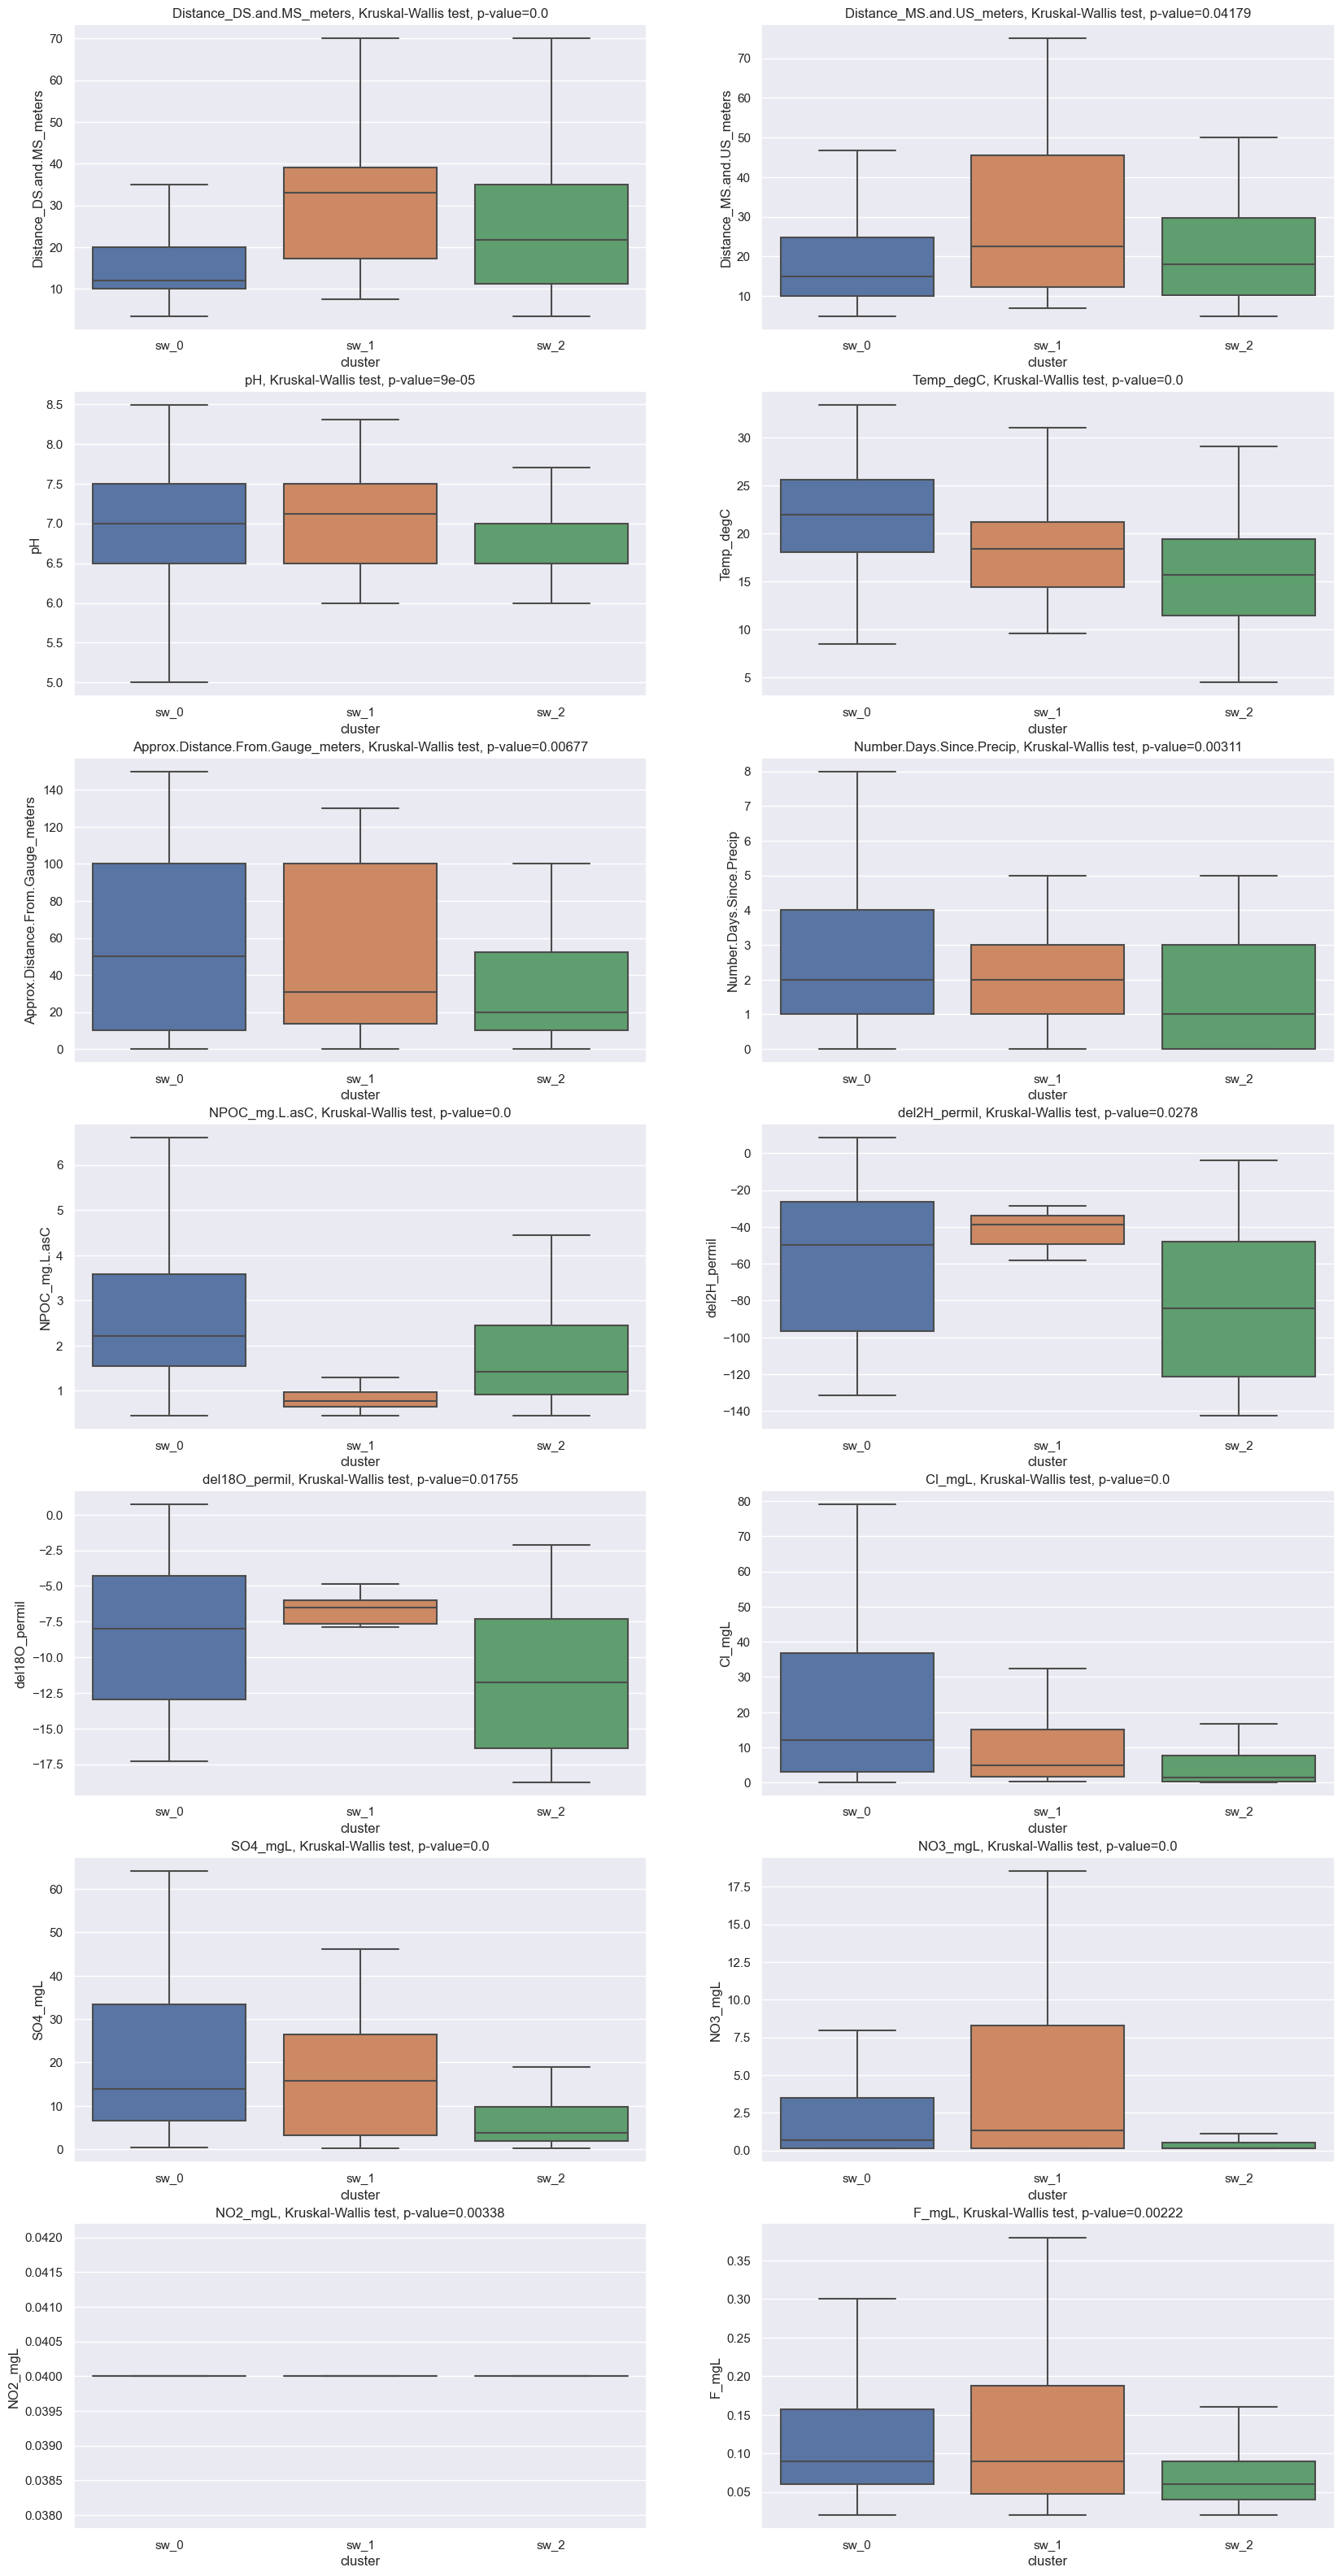

In [21]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(7,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.boxplot(x='cluster', y=i, data=water, order=['sw_0', 'sw_1', 'sw_2'], orient='v', ax=axs[cnt], showfliers = False).set_title(i + ', Kruskal-Wallis test, p-value=' + str(pv[cnt]))
    cnt = cnt + 1

# End: Update Jan 2024 - Statistical significance

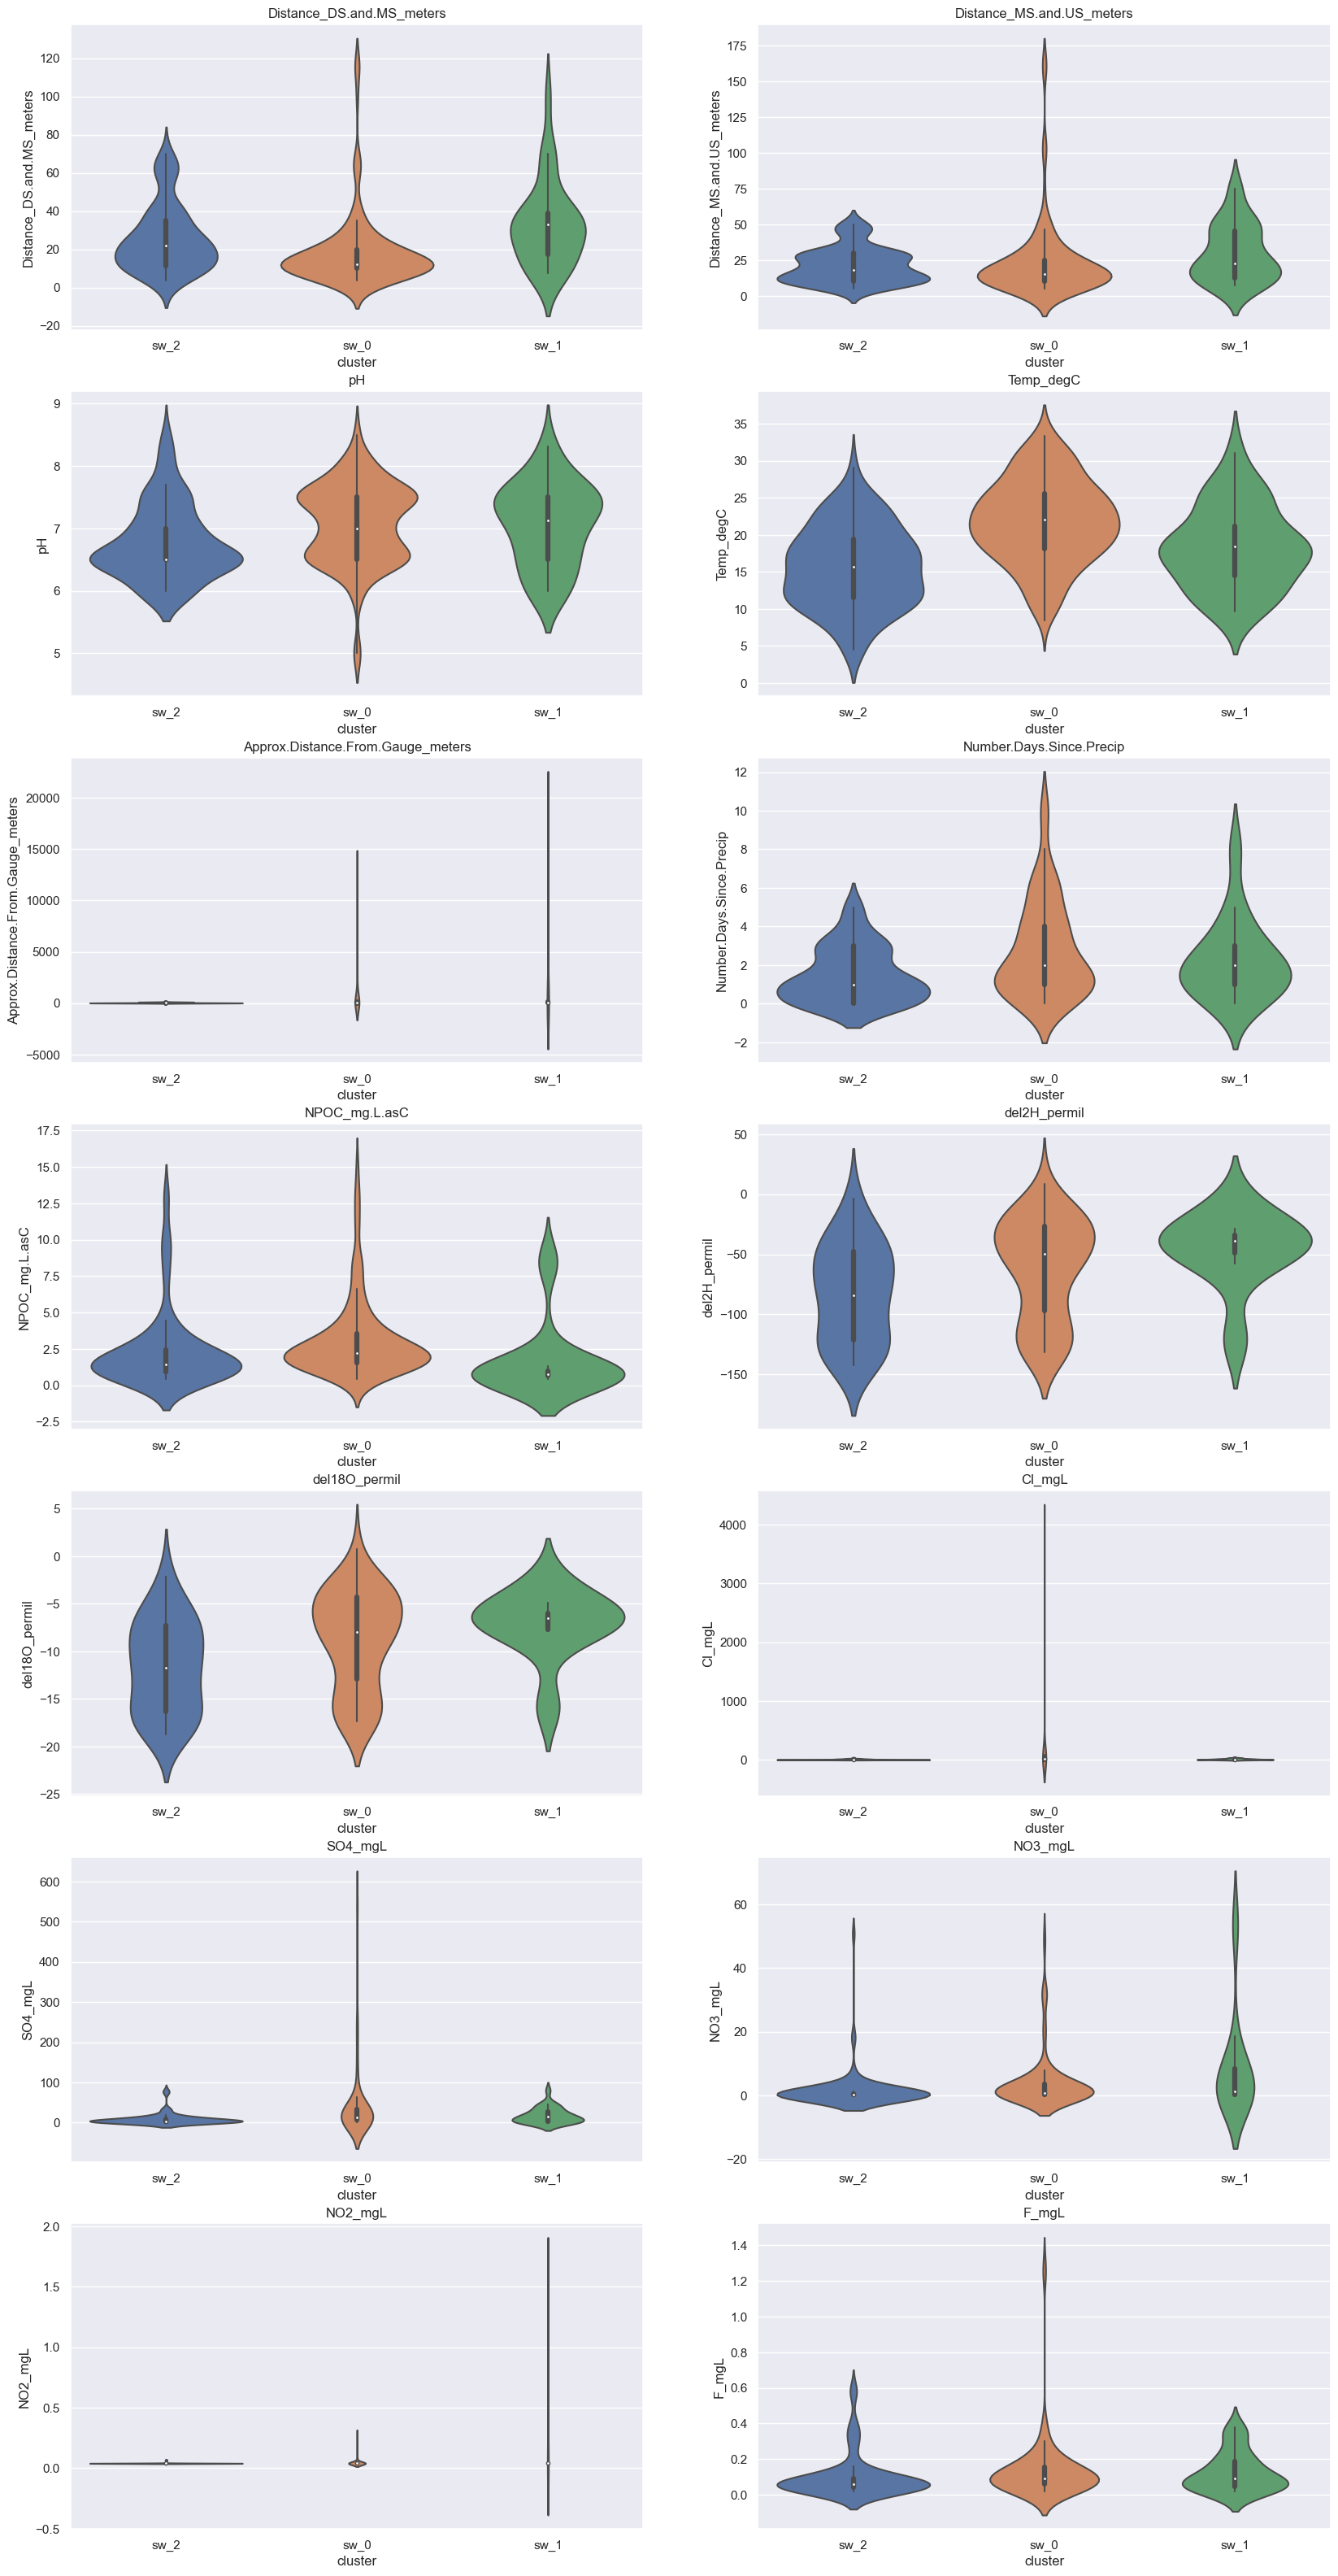

In [22]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(7,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.violinplot(x='cluster', y=i, data=water, orient='v', ax=axs[cnt]).set_title(i)
    cnt = cnt + 1

## Scatterplot


In [23]:
colnum

['Distance_DS.and.MS_meters',
 'Distance_MS.and.US_meters',
 'pH',
 'Temp_degC',
 'Approx.Distance.From.Gauge_meters',
 'Number.Days.Since.Precip',
 'NPOC_mg.L.asC',
 'del2H_permil',
 'del18O_permil',
 'Cl_mgL',
 'SO4_mgL',
 'NO3_mgL',
 'NO2_mgL',
 'F_mgL']

<Axes: xlabel='NPOC_mg.L.asC', ylabel='F_mgL'>

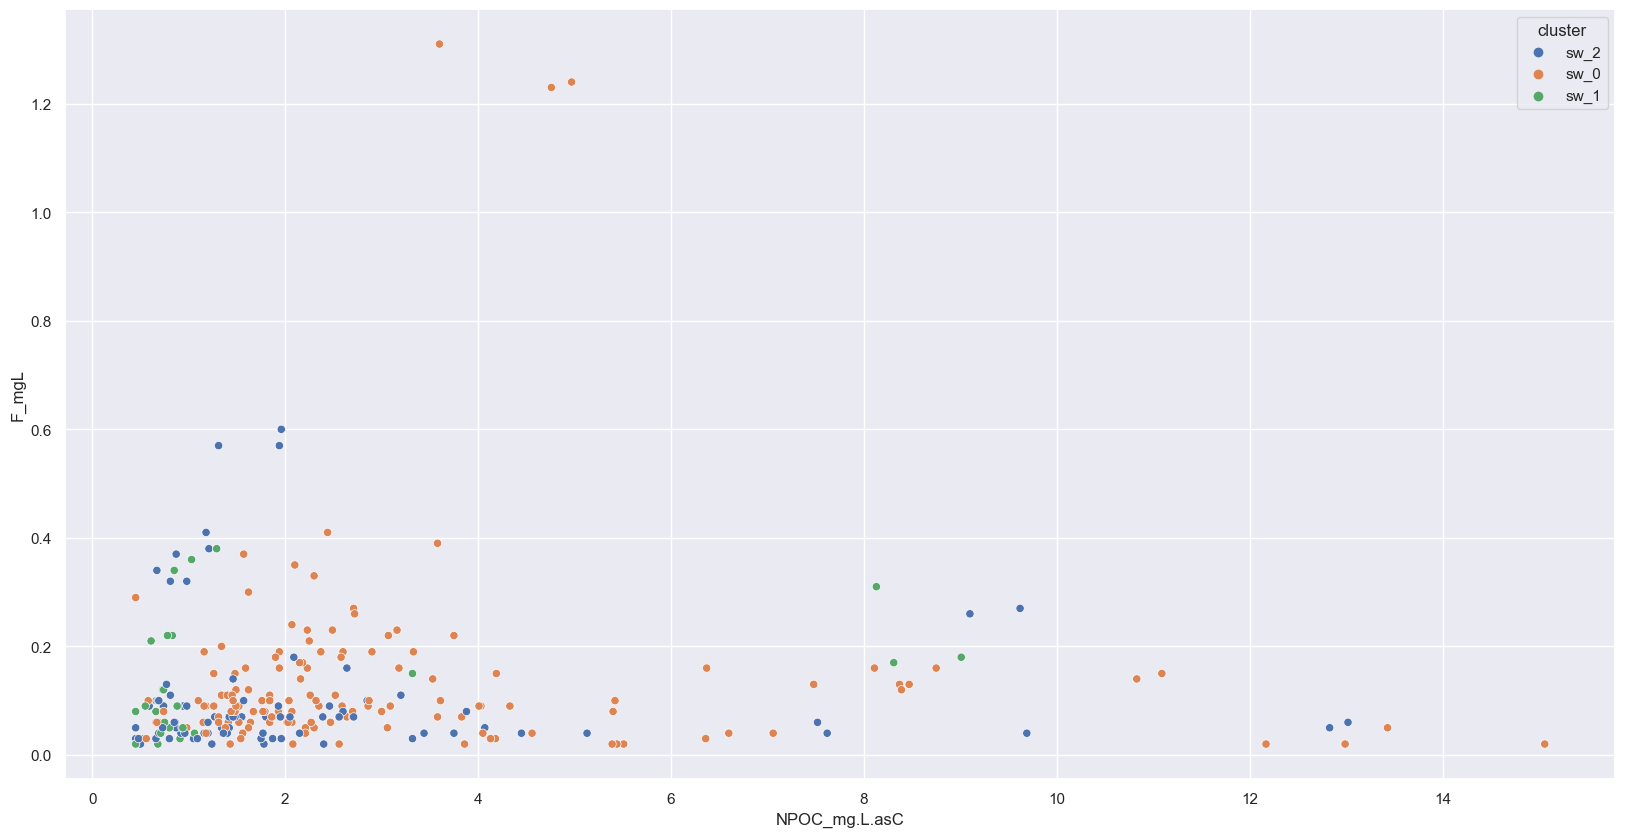

In [24]:
## NPOC vs Fe
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=water, x='NPOC_mg.L.asC', y='F_mgL', legend='full', hue='cluster')

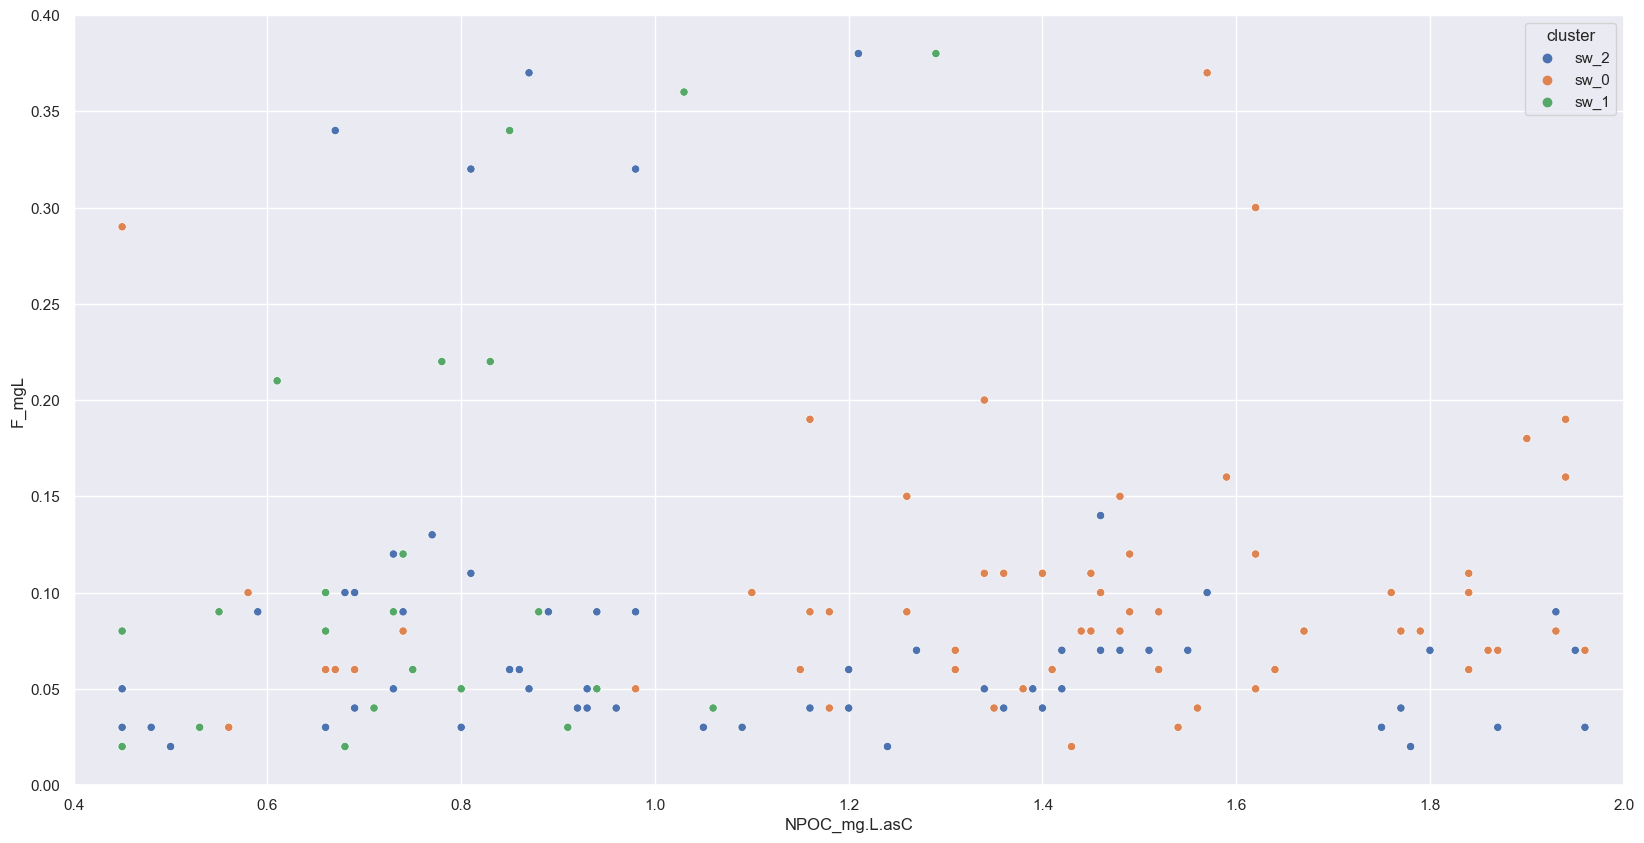

In [25]:
## NPOC vs Fe
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=water, x='NPOC_mg.L.asC', y='F_mgL', legend='full', hue='cluster')
plt.ylim(0, 0.4)
plt.xlim(0.4, 2)
plt.show()

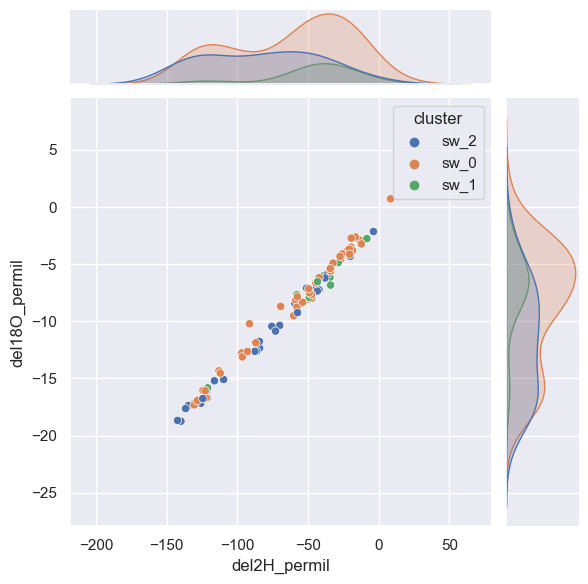

In [26]:
## 18O vs 2H
sns.set(rc={'figure.figsize':(20,10)})
sns.jointplot(data=water, x='del2H_permil', y='del18O_permil', legend='full', hue='cluster')

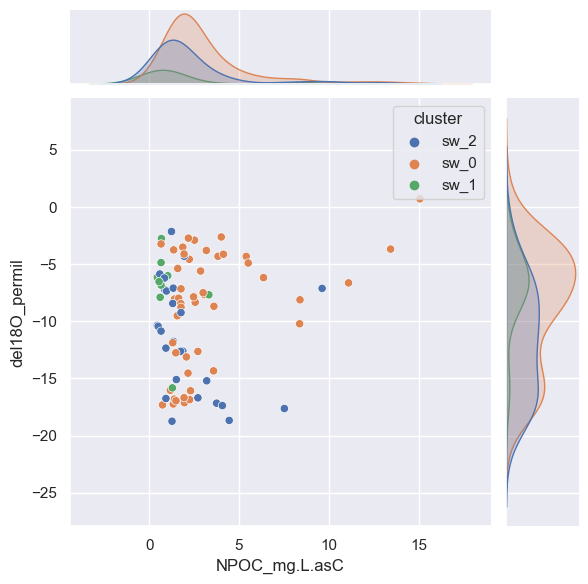

In [27]:
## NPOC vs 18O
sns.set(rc={'figure.figsize':(20,10)})
sns.jointplot(data=water, x='NPOC_mg.L.asC', y='del18O_permil', legend='full', hue='cluster')